In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
ucl = pd.read_excel('UCL_playerstats_orig.xlsx')

In [23]:
ucl.columns

Index(['PlayerID', 'Player', 'Position', 'Age', 'Nationality', 'Team',
       'Competitions', 'Phase', 'Phase_Tier', 'Value10^6', 'Jersey_Num',
       'Rating', 'Goals', 'Assists', 'TopSpeed(km/h)', 'DistanceCovered(km)',
       'Total_attempts', 'Dribbles', 'Passes_completed', 'Chances_Created',
       'Balls_recovered', 'Tackles_Won', 'Tackles_Lost', 'Saves',
       'Goals_Conceded', 'Clean_Sheets', 'MOTM_Awards', 'Minutes_played',
       'Match_played', 'DNP'],
      dtype='object')

In [39]:
features = [
    'Age', 'Position', 'Team',
    'Rating', 'Goals', 'Assists', 'Minutes_played', 'Chances_Created', 'Total_attempts'
]

X = ucl[features + ['Player']]
y = ucl['Value10^6']

#### 1️⃣ Zgjedhim veqorit(dmth features) dhe shtojm kolonen Player ne X

In [25]:
X

,Age,Position,Team,Rating,Goals,Assists,Minutes_played,Chances_Created,Total_attempts,Player
0,27,Defender,Milan,7.02,0,0,861,12,17,Theo Hernandez
1,28,Midfielder,Inter,7.11,0,2,994,14,12,Nicolo Barella
2,36,Forward,Barcelona,7.48,11,0,985,11,34,Lewandowski
3,28,Forward,Barcelona,8.31,13,9,1225,39,52,Raphinha
4,33,Defender,Liverpool FC,7.31,1,0,840,2,4,Van Dijk
...,...,...,...,...,...,...,...,...,...,...
205,22,Forward,Shakhtar Donetsk,7.15,2,0,460,5,10,Kevin
206,35,Midfielder,Lille,7.06,1,1,388,7,9,Cabella
207,27,Midfielder,Juventus,7.41,0,0,673,9,2,Locatelli
208,26,Midfielder,Bayer Leverkusen,7.43,0,0,666,7,10,Palacios


#### 2️⃣ Bojm One-Hot Encoding, por ruajm emrin veqmas

In [26]:
X_encoded = pd.get_dummies(X.drop('Player', axis=1), drop_first=True)
player_names = X['Player']

In [27]:
X_encoded

,Age,Rating,Goals,Assists,Minutes_played,Chances_Created,Total_attempts,Position_Forward,Position_Goalkeeper,Position_Midfielder,...,Team_Milan,Team_Monaco,Team_PSV Eindhoven,Team_Paris SG,Team_Real Madrid,Team_Real Madrid,Team_Shakhtar Donetsk,Team_Sporting CP,Team_Sturm Graz,Team_VfB Stuttgart
0,27,7.02,0,0,861,12,17,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,28,7.11,0,2,994,14,12,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,36,7.48,11,0,985,11,34,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,28,8.31,13,9,1225,39,52,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,33,7.31,1,0,840,2,4,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,22,7.15,2,0,460,5,10,True,False,False,...,False,False,False,False,False,False,True,False,False,False
206,35,7.06,1,1,388,7,9,False,False,True,...,False,False,False,False,False,False,False,False,False,False
207,27,7.41,0,0,673,9,2,False,False,True,...,False,False,False,False,False,False,False,False,False,False
208,26,7.43,0,0,666,7,10,False,False,True,...,False,False,False,False,False,False,False,False,False,False


#### 3️⃣ Train/test split

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, names_train, names_test = train_test_split(X_encoded, y, player_names, test_size=0.4, random_state=42)

#### 4️⃣ Trajnojm modelin Linear Regression dhe parashikojm

In [41]:
modeli = LinearRegression()
modeli.fit(X_train, y_train)
parashiku = modeli.predict(X_test)

#### 5️⃣ Krijojm DataFrame per paraqitjen finale

In [42]:
results_ucl = pd.DataFrame({
    'Player': names_test.values,
    'Actual Value': y_test.values,
    'Predicted Value': parashiku.astype(int)
})

In [43]:
results_ucl

,Player,Actual Value,Predicted Value
0,Martinelli,55.0,105
1,Mignolet,1.0,-50
2,Rafael Leao,75.0,47
3,Gravenberch,30.0,81
4,Lautaro Martinez,100.0,57
...,...,...,...
79,Julian Alvarez,90.0,52
80,Quinten Timber,32.0,2
81,Emre Can,7.0,0
82,Singo,25.0,18


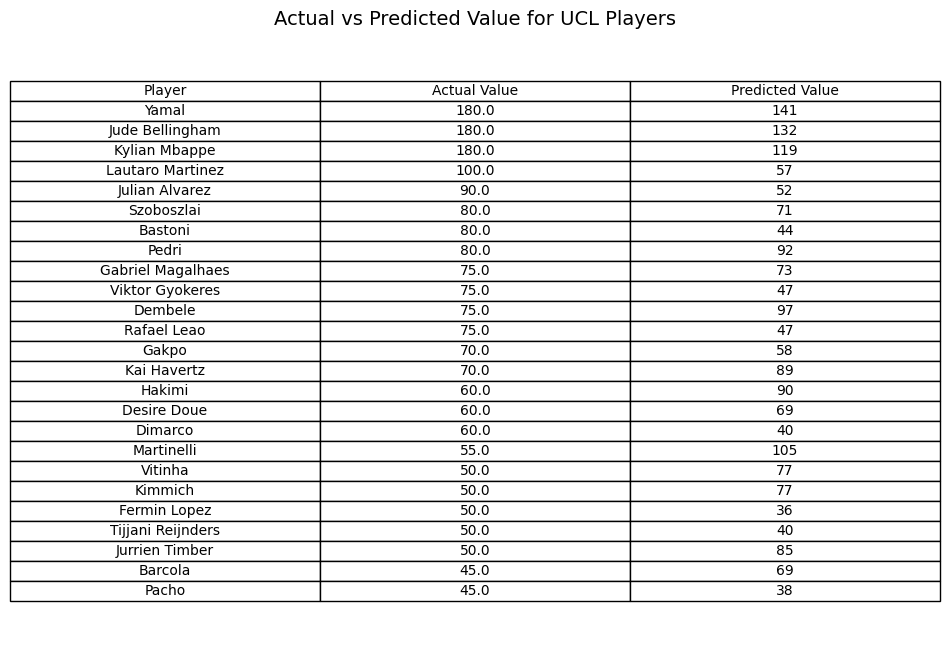

In [45]:
top_players = results_ucl.sort_values(by='Actual Value', ascending=False).head(25)

fig, ax = plt.subplots(figsize=(10, 8))
ax.axis('off')
table = ax.table(
    cellText=top_players.values,
    colLabels=top_players.columns,
    loc='center',
    cellLoc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title("Actual vs Predicted Value for UCL Players", fontsize=14)
plt.show()